x: time from last train to arrival

y: time from arrival to next train

z: time interval between two trains

And we have x+y=z

z distribution is given by history interval statistics -> gaussian distribution mean=7.5 var=2.5

x distribution: prior is given by WaitTime in ex7-1 (x dist prior = y dist prior), and is updated by "seeing 10 people waiting upon arrival"

so, y distribution is estimated by z dist - x dist 

In [54]:
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../code/")
import thinkbayes
import thinkplot


class TrainInterval(thinkbayes.Suite):
    def __init__(self,name="z"):
        pmf=thinkbayes.Pmf()
        for t in range(1,30):
            p=scipy.stats.norm.pdf(t, 7.5, 2.5)
            pmf.Set(t,p)
        pmf.Normalize()
        thinkbayes.Suite.__init__(self,pmf,name=name)

    
class ArrivalTime(thinkbayes.Suite):
    def __init__(self,name="x"):
        # prior copied from ex7-1
        metapmf=thinkbayes.Pmf()
        for t in range(1,30): 
            pmf=thinkbayes.MakeUniformPmf(low=1,high=t,n=t)
            p=scipy.stats.norm.pdf(t, 7.5, 2.5)  # assume the waiting time is norm distribution, mean=7.5 and var=2.5
            metapmf.Set(pmf,p)
        mix=thinkbayes.MakeMixture(metapmf)
        thinkbayes.Suite.__init__(self,mix,name=name)
    
    
    def Likelihood(self,data,hypo):
        k=data
        lam=2  # passenger arrival rate is given, 2 people/minute
        x=hypo  # x minutes past
        like=thinkbayes.EvalPoissonPmf(k=k,lam=lam*x)
        return like

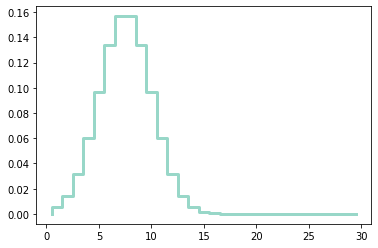

In [69]:
pmf_z=TrainInterval()
thinkplot.Pmf(pmf_z)

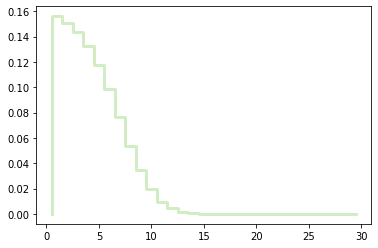

In [70]:
pmf_x=ArrivalTime()
thinkplot.Pmf(pmf_x)

{'xscale': 'linear', 'yscale': 'linear'}

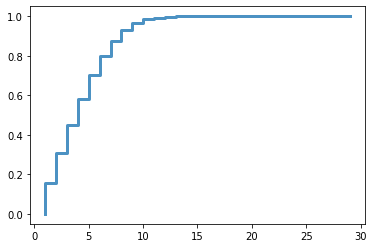

In [71]:
cdf_x_prior=pmf_x.MakeCdf()
thinkplot.Cdf(cdf_x_prior)

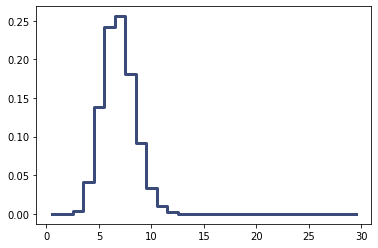

In [72]:
pmf_x.UpdateSet([15])
thinkplot.Pmf(pmf_x)

{'xscale': 'linear', 'yscale': 'linear'}

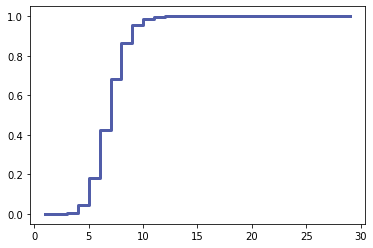

In [73]:
cdf_x_post=pmf_x.MakeCdf()
thinkplot.Cdf(cdf_x_post)

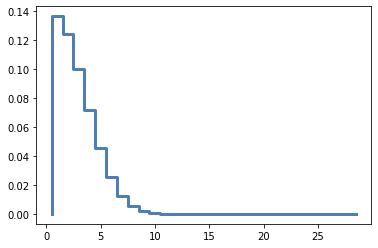

In [74]:
pmf_y=pmf_z-pmf_x
pmf_y_pos=thinkbayes.Pmf()
for val,p in pmf_y.Items():
    if val>0:
        pmf_y_pos.Set(val,p)
cdf_y=pmf_y_pos.MakeCdf()
thinkplot.Pmf(pmf_y_pos)

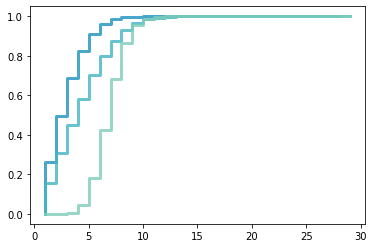

In [75]:
thinkplot.Cdfs([cdf_y,cdf_x_prior,cdf_x_post])